In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('AnnualFinanceStatement.csv')
df.head()

,concept_id,label_ko,label_en,class1,class2,class3,Date,finance_statement,corp_code,company
0,ifrs-full_EquityAndLiabilities,자본과부채총계,Total equity and liabilities,자본과부채총계,NaN,NaN,20161231,8.657152e+10,35900,JYP
1,dart_OtherNonCurrentAssets,기타비유동자산,Other non-current assets,자산,비유동자산,기타비유동자산,20161231,6.579083e+09,35900,JYP
2,entity00258689_udf_BS_20171112103350886_Noncur...,무형자산,intangible asset,자산,비유동자산,무형자산,20161231,3.097851e+10,35900,JYP
3,ifrs-full_PropertyPlantAndEquipment,유형자산,"Property, plant and equipment",자산,비유동자산,유형자산,20161231,2.524330e+08,35900,JYP
4,ifrs-full_InvestmentsInAssociates,관계기업투자,Investments in associates,자산,비유동자산,관계기업투자,20161231,8.870915e+08,35900,JYP


In [11]:
# concept_id, label_en 삭제
df = df.drop(['concept_id', 'label_en'], axis=1)
df

,label_ko,class1,class2,class3,Date,finance_statement,corp_code,company
0,자본과부채총계,자본과부채총계,NaN,NaN,20161231,8.657152e+10,35900,JYP
1,기타비유동자산,자산,비유동자산,기타비유동자산,20161231,6.579083e+09,35900,JYP
2,무형자산,자산,비유동자산,무형자산,20161231,3.097851e+10,35900,JYP
3,유형자산,자산,비유동자산,유형자산,20161231,2.524330e+08,35900,JYP
4,관계기업투자,자산,비유동자산,관계기업투자,20161231,8.870915e+08,35900,JYP
...,...,...,...,...,...,...,...,...
3308,기타장기종업원급여부채,부채,비유동부채,기타장기종업원급여부채,20221231,7.316807e+10,35720,카카오
3309,비유동파생상품부채,부채,비유동부채,비유동파생상품부채,20221231,3.540223e+09,35720,카카오
3310,이연법인세부채,부채,비유동부채,이연법인세부채,20221231,6.526409e+11,35720,카카오
3311,비유동매입채무 및 기타채무,부채,비유동부채,비유동매입채무 및 기타채무,20221231,1.105919e+11,35720,카카오


In [4]:
# Company column에 저장된 회사 종류
company_types = df['company'].unique()
formatted_output = ', '.join(['"' + company + '"' for company in company_types])
print('[' + formatted_output + ']')

["JYP", "SK하이닉스", "삼성SDI", "삼성바이오로직스", "에코프로", "에코프로비엠", "엘앤에프", "펄어비스", "네이버", "카카오"]


In [17]:
# 결측치 개수 파악
'''
class 2, 3에 있는 결측치는 해당 자산의 Feature을 나타내는 column이므로 삭제하거나 채울 필요가 없으므로 개수 파악할 필요가 없다 
'''
nan_counts = df.drop(columns=['class2', 'class3']).isnull().sum().to_frame('nan_count')
nan_counts


,nan_count
label_ko,0
class1,0
Date,0
finance_statement,287
corp_code,0
company,0


In [19]:
# finance_statement는 자산을 의미하므로 결측치들을 0으로 채운다.
df['finance_statement'].fillna(0, inplace=True)
nan_counts = df.drop(columns=['class2', 'class3']).isnull().sum().to_frame('nan_count')
nan_counts


,nan_count
label_ko,0
class1,0
Date,0
finance_statement,0
corp_code,0
company,0


In [20]:
# Company column에 저장된 회사 종류
company_types = df['class1'].unique()
formatted_output = ', '.join(['"' + company + '"' for company in company_types])
print('[' + formatted_output + ']')

["자본과부채총계", "자산", "자본", "부채", "부채및자본총계", "부채와자본총계"]


In [25]:
result = df['class1'].value_counts().reset_index()
result

,index,class1
0,자산,1460
1,부채,1283
2,자본,511
3,자본과부채총계,45
4,부채및자본총계,7
5,부채와자본총계,7


In [23]:
result = df['class2'].value_counts().reset_index()
result

,index,class2
0,비유동자산,721
1,유동자산,589
2,유동부채,580
3,비유동부채,567
4,지배기업의 소유주에게 귀속되는 자본,102
5,금융업자산,84
6,지배기업 소유주지분,84
7,지배기업의 소유주지분,84
8,지배기업의 소유지분,79
9,부채총계,66


In [34]:
# company내에서 같은 class끼리 정렬
df = df.sort_values(by=['company', 'class1', 'class2', 'class3'])
df.to_csv('cleaned_AnnualFinanceStatement_eda.csv', index=False)
df

# 부채총계가 늘어나면 주가 하락
# 자산총계가 늘어나면 주가 상승 
# 상관관계 분석

,label_ko,class1,class2,class3,Date,finance_statement,corp_code,company
28,부채총계,부채,부채총계,NaN,20161231,1.952979e+10,35900,JYP
67,부채총계,부채,부채총계,NaN,20171231,3.866761e+10,35900,JYP
108,부채총계,부채,부채총계,NaN,20181231,3.137387e+10,35900,JYP
134,부채총계,부채,부채총계,NaN,20191231,4.548974e+10,35900,JYP
184,부채총계,부채,부채총계,NaN,20201231,3.770237e+10,35900,JYP
...,...,...,...,...,...,...,...,...
2185,자산총계,자산,자산총계,NaN,20181231,7.125302e+11,263750,펄어비스
2272,자산총계,자산,자산총계,NaN,20191231,8.673910e+11,263750,펄어비스
2282,자산총계,자산,자산총계,NaN,20201231,8.971916e+11,263750,펄어비스
2326,자산총계,자산,자산총계,NaN,20211231,1.356600e+12,263750,펄어비스


In [36]:
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.split('.').str[0], format='%Y%m%d')
df

,label_ko,class1,class2,class3,Date,finance_statement,corp_code,company
28,부채총계,부채,부채총계,NaN,2016-12-31,1.952979e+10,35900,JYP
67,부채총계,부채,부채총계,NaN,2017-12-31,3.866761e+10,35900,JYP
108,부채총계,부채,부채총계,NaN,2018-12-31,3.137387e+10,35900,JYP
134,부채총계,부채,부채총계,NaN,2019-12-31,4.548974e+10,35900,JYP
184,부채총계,부채,부채총계,NaN,2020-12-31,3.770237e+10,35900,JYP
...,...,...,...,...,...,...,...,...
2185,자산총계,자산,자산총계,NaN,2018-12-31,7.125302e+11,263750,펄어비스
2272,자산총계,자산,자산총계,NaN,2019-12-31,8.673910e+11,263750,펄어비스
2282,자산총계,자산,자산총계,NaN,2020-12-31,8.971916e+11,263750,펄어비스
2326,자산총계,자산,자산총계,NaN,2021-12-31,1.356600e+12,263750,펄어비스


In [39]:
df.to_csv('cleaned_AnnualFinanceStatement_eda.csv', index=False)

In [54]:
import matplotlib.font_manager as fm
system_fonts = fm.findSystemFonts()
print(system_fonts)


['/usr/share/fonts/opentype/urw-base35/P052-Roman.otf', '/usr/share/fonts/opentype/urw-base35/NimbusSans-Bold.otf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-BoldOblique.otf', '/usr/share/fonts/truetype/noto/NotoSansMono-Bold.ttf', '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Regular.otf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf', '/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

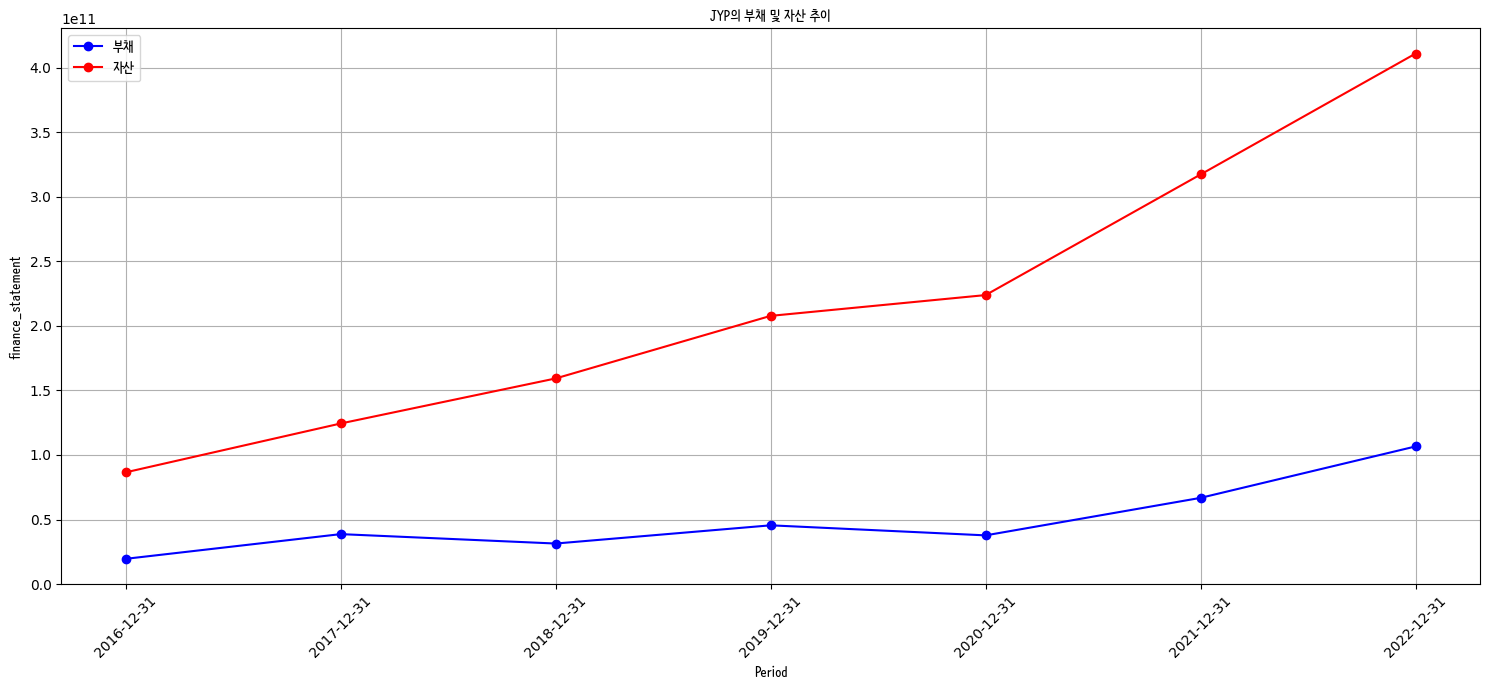

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

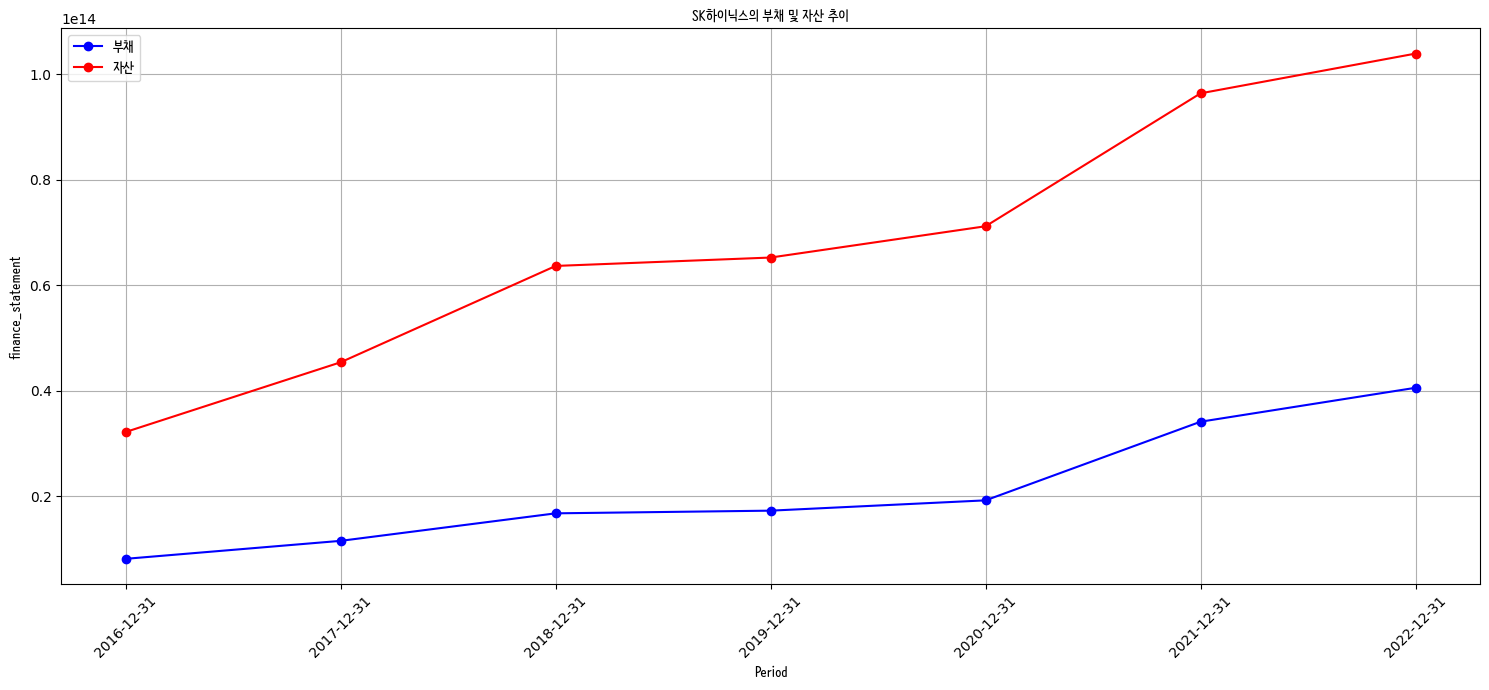

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

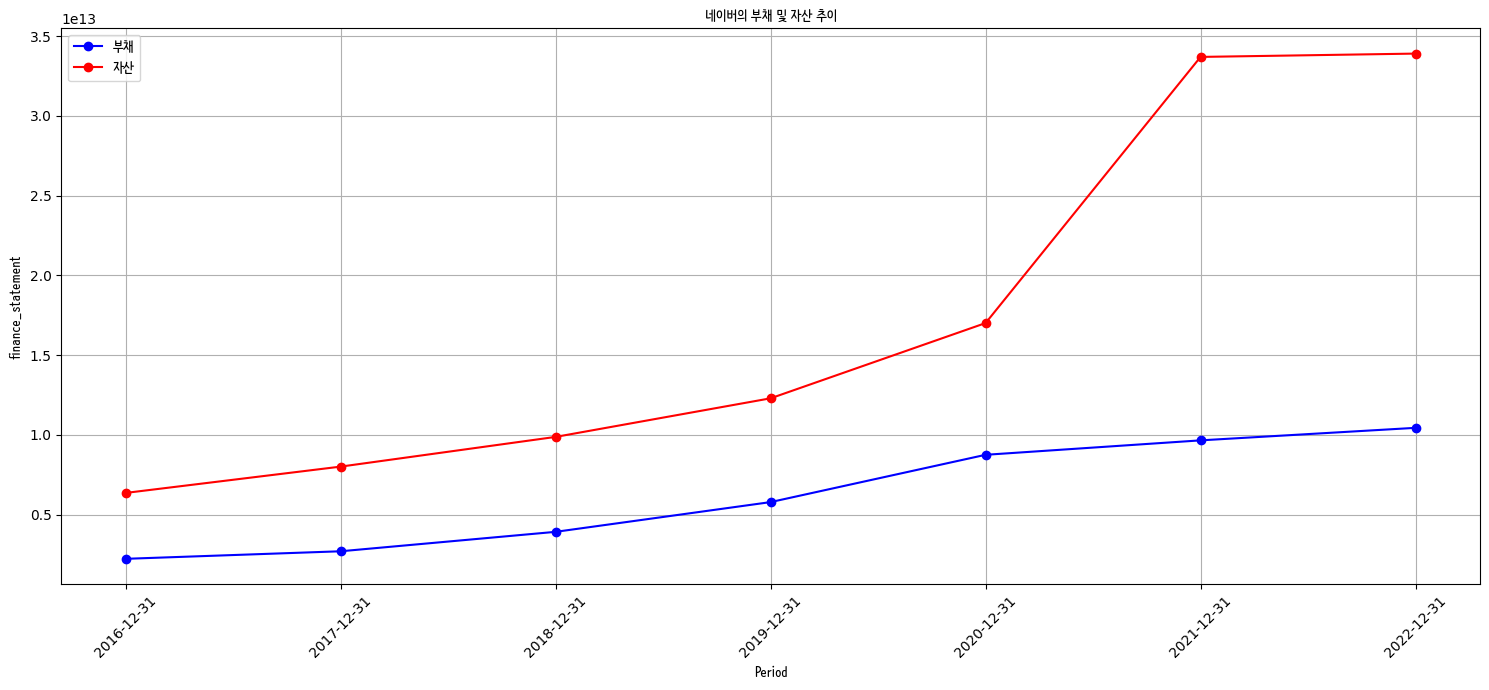

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

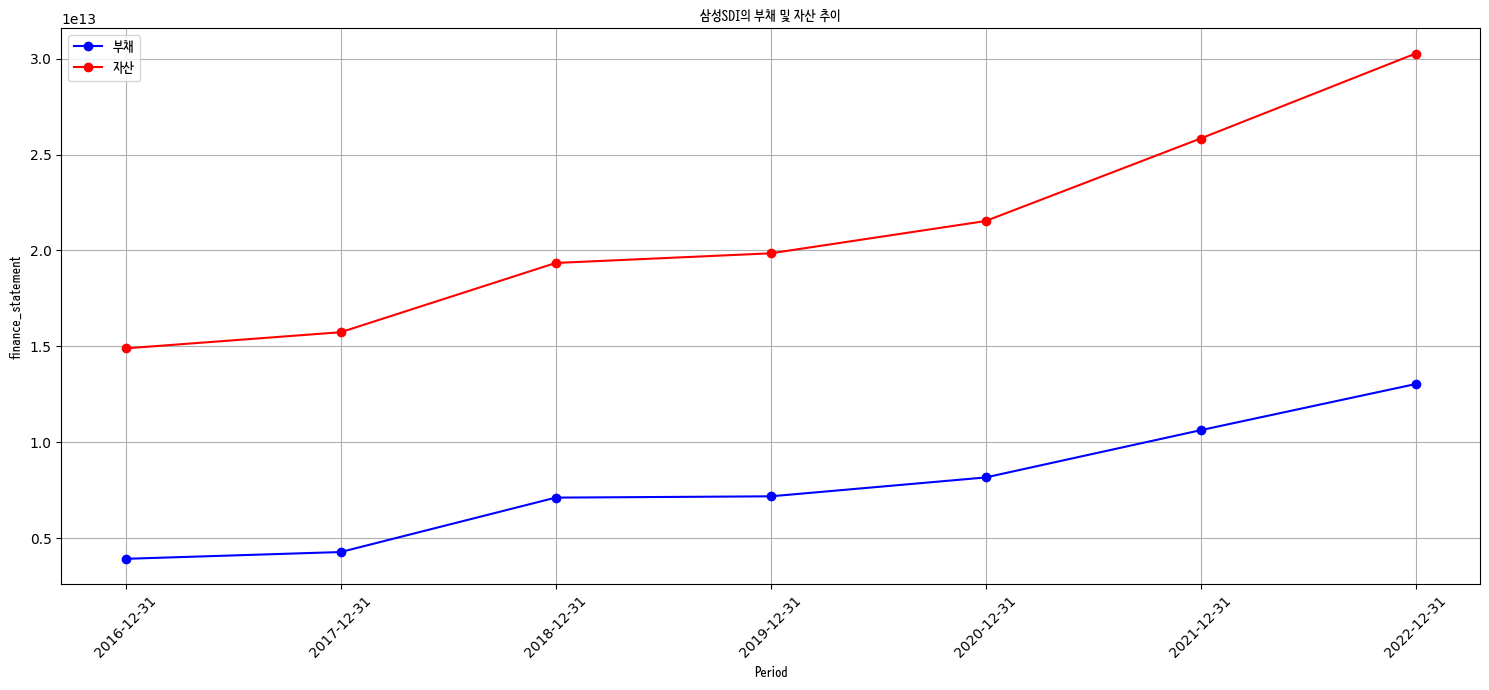

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

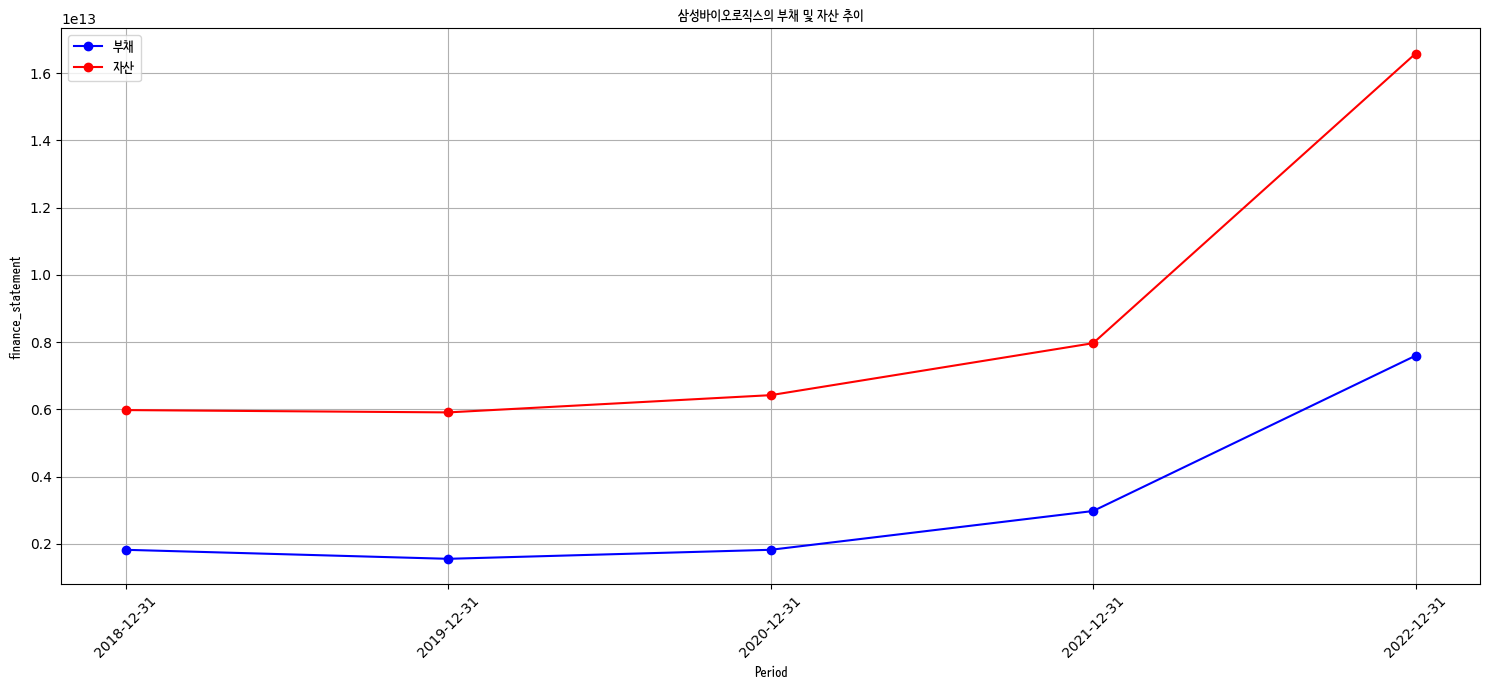

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

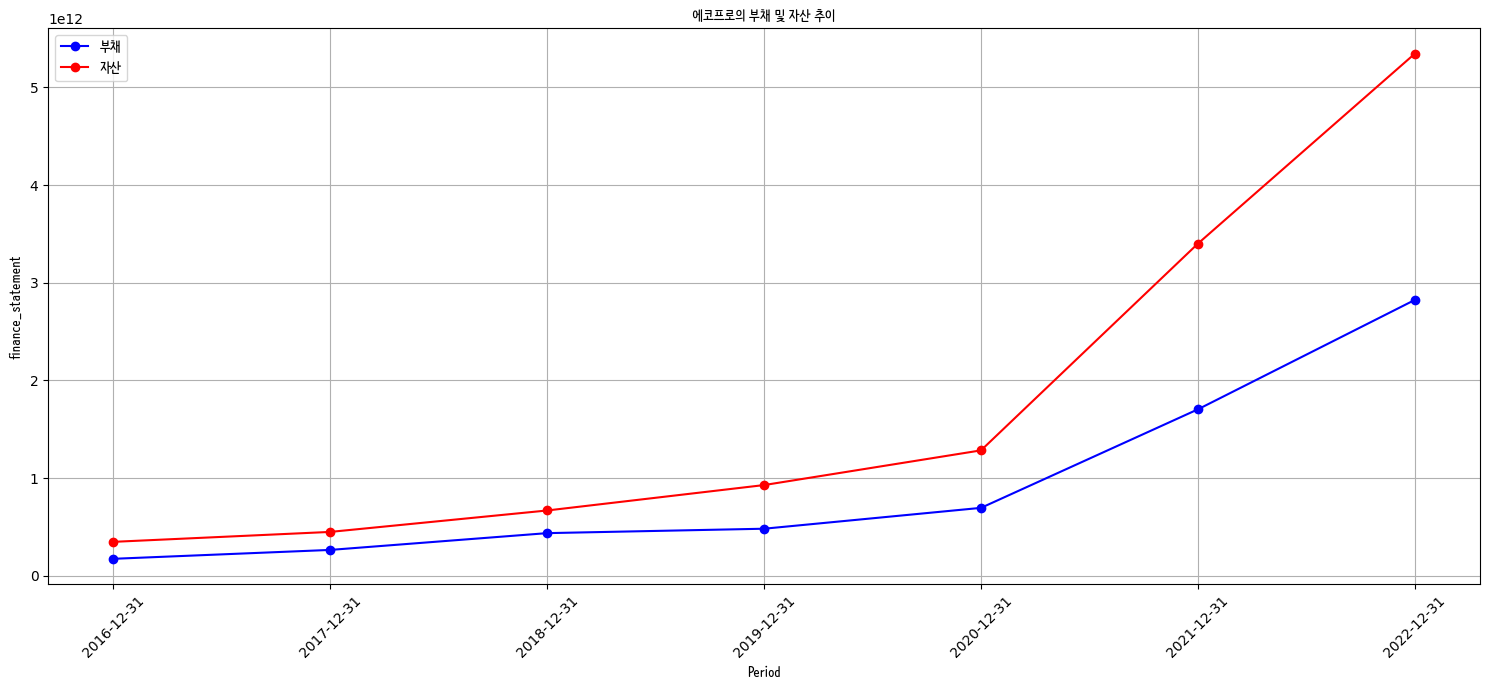

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

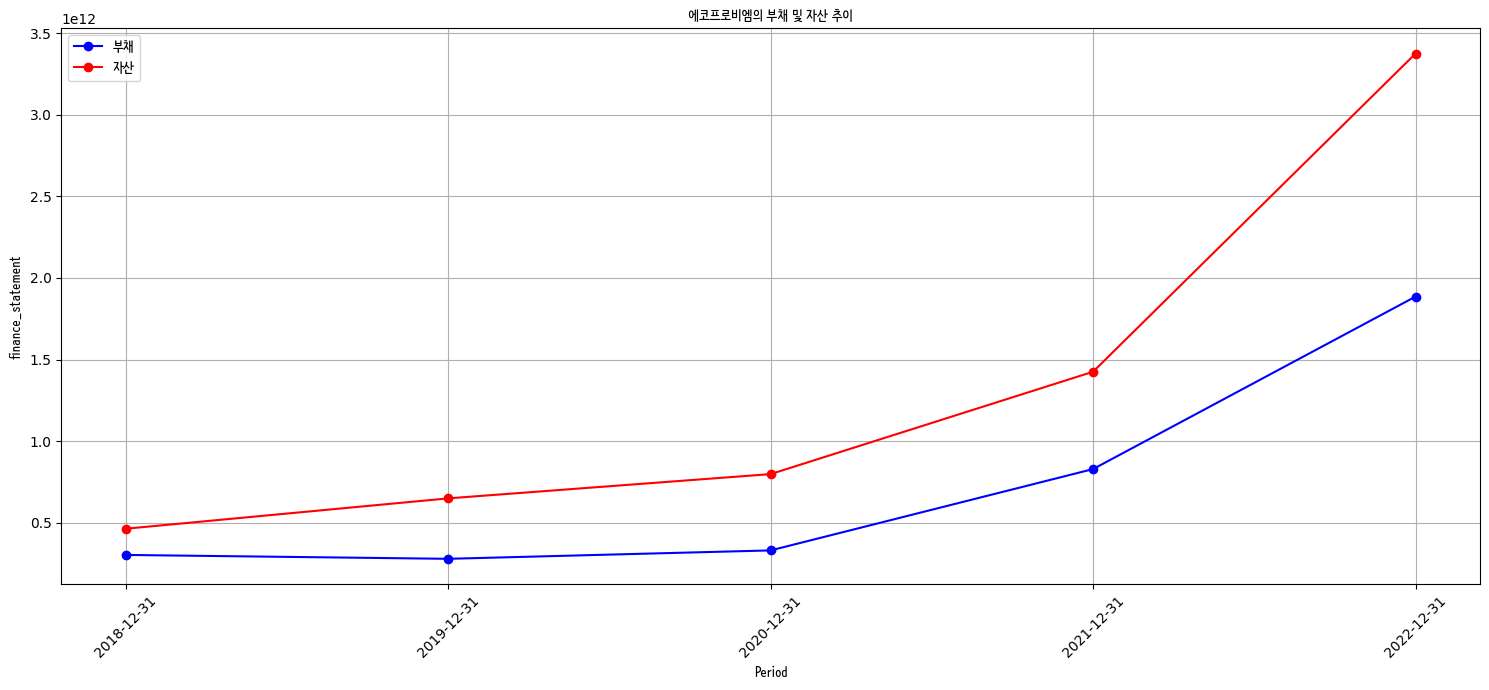

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

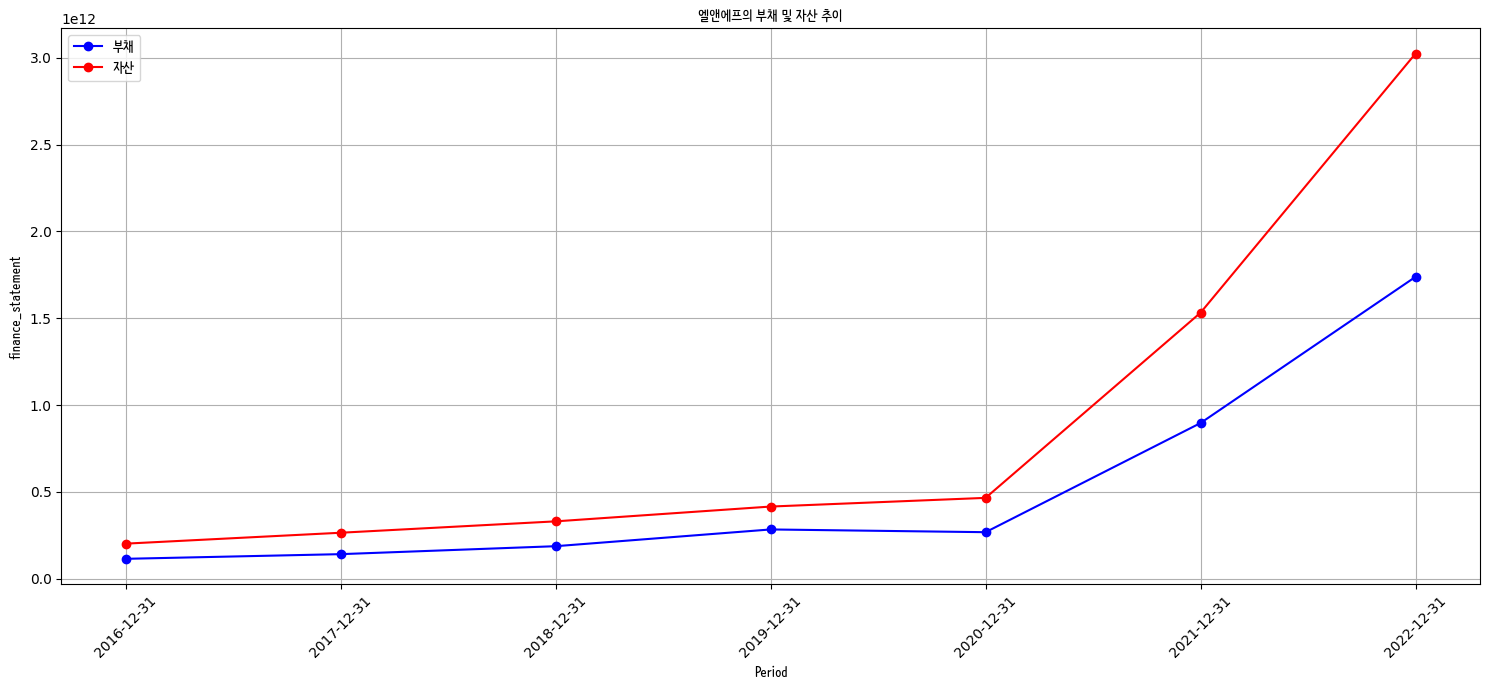

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

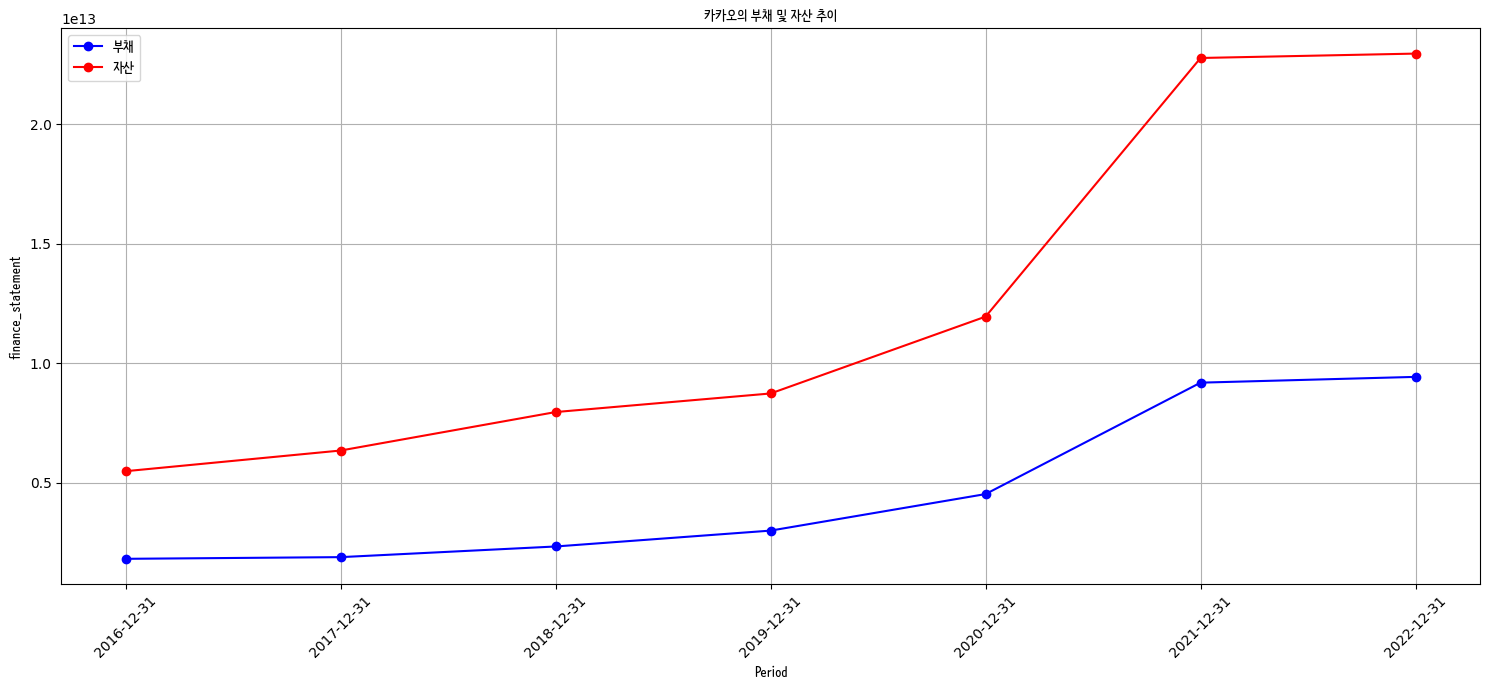

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

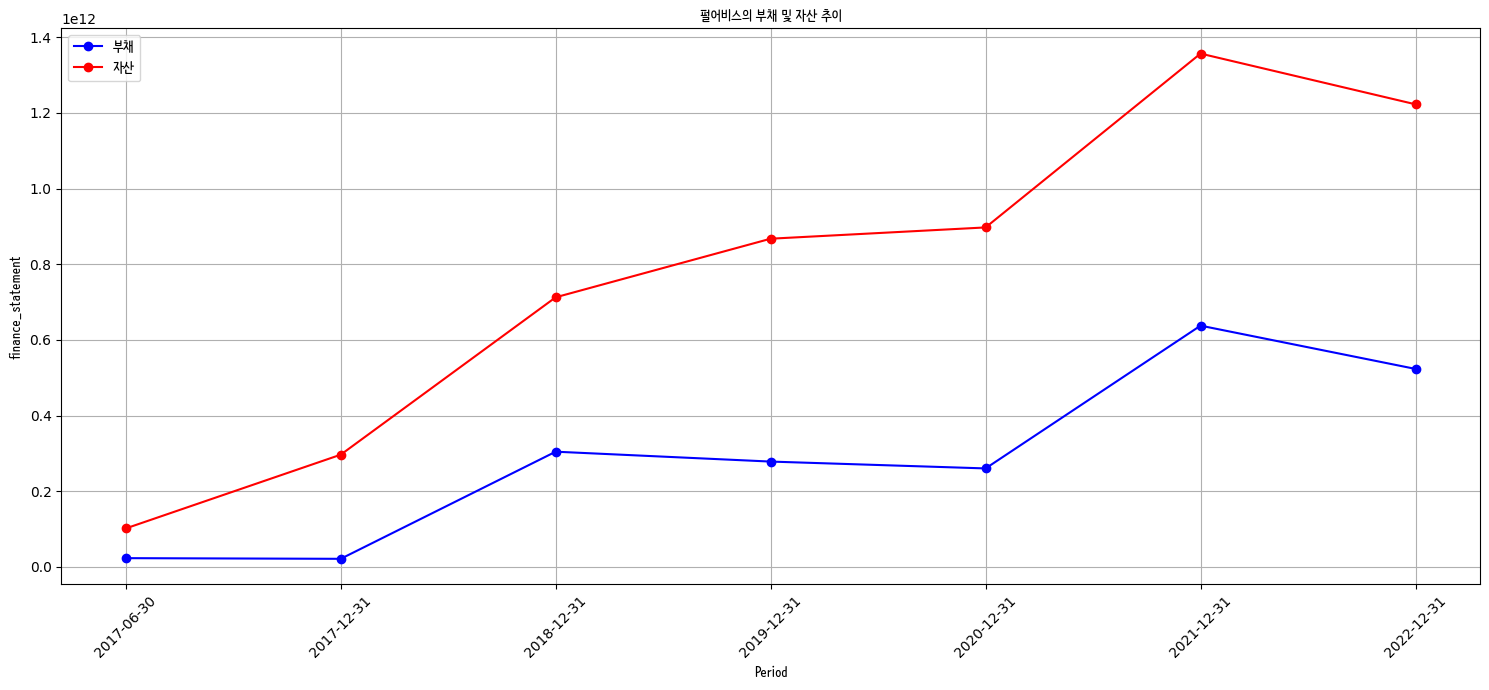

In [86]:
# 필터링 조건을 적용합니다.
debt_df = df[(df['class1'] == '부채') & (df['class2'] == '부채총계')]
asset_df = df[(df['class1'] == '자산') & (df['class2'] == '자산총계')]

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)

companies = df['company'].unique()

for company in companies:
    plt.figure(figsize=(15,7))
    
    # 부채 데이터 그리기
    company_debt = debt_df[debt_df['company'] == company]
    plt.plot(company_debt['Date'], company_debt['finance_statement'], marker='o', linestyle='-', color='blue', label='부채')
    
    # 자산 데이터 그리기
    company_asset = asset_df[asset_df['company'] == company]
    plt.plot(company_asset['Date'], company_asset['finance_statement'], marker='o', linestyle='-', color='red', label='자산')
    
    plt.xlabel('Period',fontproperties=font_prop)
    plt.ylabel('finance_statement',fontproperties=font_prop),
    plt.title(f'{company}의 부채 및 자산 추이', fontproperties=font_prop)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(prop=font_prop, loc='upper left')
    plt.tight_layout()
    plt.show()
